In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('tabel_analisa.csv')
df.head()

,transaction_id,date,branch_id,branch_name,kota,provinsi,rating_cabang,customer_name,product_id,product_name,actual_price,discount_percentage,presentase_gross_laba,nett_sales,nett_profit,rating_transaksi
0,TRX5844188,9/7/2023,88605,Kimia Farma - Klinik & Apotek,Sukabumi,Jawa Barat,4.7,Elizabeth Thomas,KF260,"Other analgesics and antipyretics, Pyrazolones...",118700,0.05,0.2,112765.0,17805.0,3.0
1,TRX6182886,11/7/2022,27840,Kimia Farma - Apotek,Denpasar,Bali,4.3,Andrew Martinez,KF492,"Psycholeptics drugs, Hypnotics and sedatives d...",751900,0.07,0.3,699267.0,172937.0,4.8
2,TRX7691180,5/30/2023,62913,Kimia Farma - Apotek,Palembang,Sumatera Selatan,4.5,Charles Reynolds,KF540,"Other analgesics and antipyretics, Salicylic a...",744200,0.03,0.3,721874.0,200934.0,3.3
3,TRX3205743,11/28/2022,31604,Kimia Farma - Apotek,Pontianak,Kalimantan Barat,4.4,Casey Cochran,KF389,Drugs for obstructive airway diseases,761700,0.06,0.3,715998.0,182808.0,3.5
4,TRX3644533,5/28/2023,20322,Kimia Farma - Klinik-Apotek-Laboratorium,Subang,Jawa Barat,4.1,Rebecca Moore,KF854,Drugs for obstructive airway diseases,681000,0.13,0.3,592470.0,115770.0,4.1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672458 entries, 0 to 672457
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   transaction_id         672458 non-null  object 
 1   date                   672458 non-null  object 
 2   branch_id              672458 non-null  int64  
 3   branch_name            672458 non-null  object 
 4   kota                   672458 non-null  object 
 5   provinsi               672458 non-null  object 
 6   rating_cabang          672458 non-null  float64
 7   customer_name          672458 non-null  object 
 8   product_id             672458 non-null  object 
 9   product_name           672458 non-null  object 
 10  actual_price           672458 non-null  int64  
 11  discount_percentage    672458 non-null  float64
 12  presentase_gross_laba  672458 non-null  float64
 13  nett_sales             672458 non-null  float64
 14  nett_profit            672458 non-nu

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672458 entries, 0 to 672457
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   transaction_id         672458 non-null  object        
 1   date                   672458 non-null  datetime64[ns]
 2   branch_id              672458 non-null  int64         
 3   branch_name            672458 non-null  object        
 4   kota                   672458 non-null  object        
 5   provinsi               672458 non-null  object        
 6   rating_cabang          672458 non-null  float64       
 7   customer_name          672458 non-null  object        
 8   product_id             672458 non-null  object        
 9   product_name           672458 non-null  object        
 10  actual_price           672458 non-null  int64         
 11  discount_percentage    672458 non-null  float64       
 12  presentase_gross_laba  672458 non-null  floa

# Data Cleaning

In [14]:
df.isnull().sum()

transaction_id           0
date                     0
branch_id                0
branch_name              0
kota                     0
provinsi                 0
rating_cabang            0
customer_name            0
product_id               0
product_name             0
actual_price             0
discount_percentage      0
presentase_gross_laba    0
nett_sales               0
nett_profit              0
rating_transaksi         0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

# Cohort Analysis

In [46]:
df_cohort = df[df['date'].dt.year == 2023 ]

In [47]:
df_cohort['cohort'] = df['date'].dt.to_period('M')
df_cohort.head()

C:\Users\faruq\AppData\Local\Temp\ipykernel_6304\2896099320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cohort['cohort'] = df['date'].dt.to_period('M')


,transaction_id,date,branch_id,branch_name,kota,provinsi,rating_cabang,customer_name,product_id,product_name,actual_price,discount_percentage,presentase_gross_laba,nett_sales,nett_profit,rating_transaksi,cohort
0,TRX5844188,2023-09-07,88605,Kimia Farma - Klinik & Apotek,Sukabumi,Jawa Barat,4.7,Elizabeth Thomas,KF260,"Other analgesics and antipyretics, Pyrazolones...",118700,0.05,0.20,112765.0,17805.0,3.0,2023-09
2,TRX7691180,2023-05-30,62913,Kimia Farma - Apotek,Palembang,Sumatera Selatan,4.5,Charles Reynolds,KF540,"Other analgesics and antipyretics, Salicylic a...",744200,0.03,0.30,721874.0,200934.0,3.3,2023-05
4,TRX3644533,2023-05-28,20322,Kimia Farma - Klinik-Apotek-Laboratorium,Subang,Jawa Barat,4.1,Rebecca Moore,KF854,Drugs for obstructive airway diseases,681000,0.13,0.30,592470.0,115770.0,4.1,2023-05
6,TRX2800835,2023-10-11,47342,Kimia Farma - Apotek,Padang Sidempuan,Sumatera Utara,4.3,Susan Morris,KF576,"Other analgesics and antipyretics, Salicylic a...",353300,0.07,0.25,328569.0,63594.0,4.6,2023-10
8,TRX4221759,2023-04-18,76684,Kimia Farma - Klinik & Apotek,Yogyakarta,DI Yogyakarta,4.1,Todd Ferrell,KF248,"Psycholeptics drugs, Hypnotics and sedatives d...",215100,0.01,0.20,212949.0,40869.0,4.9,2023-04


In [48]:
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167468 entries, 0 to 672454
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   transaction_id         167468 non-null  object        
 1   date                   167468 non-null  datetime64[ns]
 2   branch_id              167468 non-null  int64         
 3   branch_name            167468 non-null  object        
 4   kota                   167468 non-null  object        
 5   provinsi               167468 non-null  object        
 6   rating_cabang          167468 non-null  float64       
 7   customer_name          167468 non-null  object        
 8   product_id             167468 non-null  object        
 9   product_name           167468 non-null  object        
 10  actual_price           167468 non-null  int64         
 11  discount_percentage    167468 non-null  float64       
 12  presentase_gross_laba  167468 non-null  float64  

In [49]:
cohort_monthly = df_cohort.groupby(['customer_name','cohort'], as_index=False).agg(
    order_count=('transaction_id','nunique')
)

In [50]:
cohort_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154086 entries, 0 to 154085
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype    
---  ------         --------------   -----    
 0   customer_name  154086 non-null  object   
 1   cohort         154086 non-null  period[M]
 2   order_count    154086 non-null  int64    
dtypes: int64(1), object(1), period[M](1)
memory usage: 3.5+ MB


In [51]:
cohort_monthly['first_transaction'] = cohort_monthly.groupby('customer_name')['cohort'].transform('min')
cohort_monthly

,customer_name,cohort,order_count,first_transaction
0,Aaron Acevedo,2023-08,1,2023-08
1,Aaron Aguilar,2023-07,1,2023-07
2,Aaron Aguirre,2023-07,1,2023-07
3,Aaron Alexander,2023-03,1,2023-03
4,Aaron Allen,2023-01,1,2023-01
...,...,...,...,...
154081,Zoe Sanchez,2023-05,1,2023-05
154082,Zoe Shelton,2023-10,1,2023-10
154083,Zoe Smith,2023-07,1,2023-07
154084,Zoe Williams,2023-10,1,2023-10


In [52]:
from operator import attrgetter

cohort_monthly['period_num'] = (cohort_monthly['cohort'] - cohort_monthly['first_transaction']).apply(attrgetter('n')) + 1

In [53]:
cohort_monthly

,customer_name,cohort,order_count,first_transaction,period_num
0,Aaron Acevedo,2023-08,1,2023-08,1
1,Aaron Aguilar,2023-07,1,2023-07,1
2,Aaron Aguirre,2023-07,1,2023-07,1
3,Aaron Alexander,2023-03,1,2023-03,1
4,Aaron Allen,2023-01,1,2023-01,1
...,...,...,...,...,...
154081,Zoe Sanchez,2023-05,1,2023-05,1
154082,Zoe Shelton,2023-10,1,2023-10,1
154083,Zoe Smith,2023-07,1,2023-07,1
154084,Zoe Williams,2023-10,1,2023-10,1


In [54]:
cohort_pivot = pd.pivot_table(cohort_monthly, index='first_transaction', columns='period_num', values='customer_name', aggfunc=pd.Series.nunique)
cohort_pivot

period_num,1,2,3,4,5,6,7,8,9,10,11,12
first_transaction,,,,,,,,,,,,
2023-01,13098.0,1412.0,1555.0,1519.0,1544.0,1485.0,1531.0,1559.0,1521.0,1491.0,1479.0,1502.0
2023-02,10673.0,916.0,913.0,920.0,913.0,962.0,928.0,877.0,929.0,899.0,914.0,NaN
2023-03,10682.0,727.0,760.0,749.0,774.0,805.0,738.0,774.0,759.0,777.0,NaN,NaN
2023-04,9451.0,649.0,572.0,587.0,611.0,602.0,618.0,594.0,543.0,NaN,NaN,NaN
2023-05,9119.0,498.0,527.0,546.0,517.0,541.0,475.0,563.0,NaN,NaN,NaN,NaN
2023-06,8354.0,405.0,425.0,394.0,435.0,407.0,397.0,NaN,NaN,NaN,NaN,NaN
2023-07,8338.0,370.0,389.0,395.0,353.0,397.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,7797.0,334.0,345.0,305.0,324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,7419.0,322.0,289.0,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
cohort_size = cohort_pivot.iloc[:, 0]
cohort_size

first_transaction
2023-01    13098.0
2023-02    10673.0
2023-03    10682.0
2023-04     9451.0
2023-05     9119.0
2023-06     8354.0
2023-07     8338.0
2023-08     7797.0
2023-09     7419.0
2023-10     7224.0
2023-11     6876.0
2023-12     6646.0
Freq: M, Name: 1, dtype: float64

In [56]:
retention_cohort = cohort_pivot.divide(cohort_size, axis=0)
retention_cohort

period_num,1,2,3,4,5,6,7,8,9,10,11,12
first_transaction,,,,,,,,,,,,
2023-01,1.0,0.107803,0.118720,0.115972,0.117881,0.113376,0.116888,0.119026,0.116125,0.113834,0.112918,0.114674
2023-02,1.0,0.085824,0.085543,0.086199,0.085543,0.090134,0.086948,0.082170,0.087042,0.084231,0.085637,NaN
2023-03,1.0,0.068058,0.071148,0.070118,0.072458,0.075360,0.069088,0.072458,0.071054,0.072739,NaN,NaN
2023-04,1.0,0.068670,0.060523,0.062110,0.064649,0.063697,0.065390,0.062850,0.057454,NaN,NaN,NaN
2023-05,1.0,0.054611,0.057791,0.059875,0.056695,0.059327,0.052089,0.061739,NaN,NaN,NaN,NaN
2023-06,1.0,0.048480,0.050874,0.047163,0.052071,0.048719,0.047522,NaN,NaN,NaN,NaN,NaN
2023-07,1.0,0.044375,0.046654,0.047373,0.042336,0.047613,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,1.0,0.042837,0.044248,0.039118,0.041554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,1.0,0.043402,0.038954,0.041515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


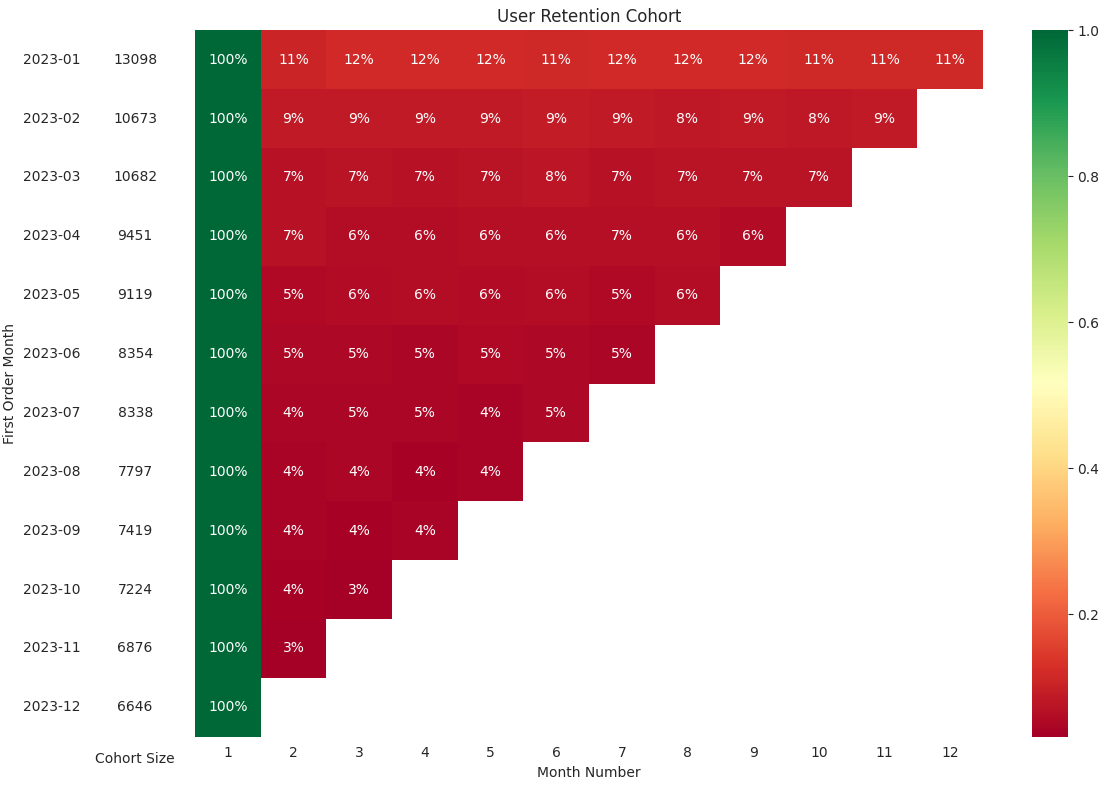

In [57]:
import matplotlib.colors as mcolors

with sns.axes_style('white'):

    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios':[1, 11]})

    # user retention cohort
    sns.heatmap(retention_cohort, annot=True, fmt='.0%', cmap='RdYlGn', ax=ax[1])
    ax[1].set_title('User Retention Cohort')
    ax[1].set(xlabel='Month Number', ylabel='')

    # cohort size
    df_cohort_size = pd.DataFrame(cohort_size)
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(df_cohort_size, annot=True, cbar=False, fmt='g', cmap=white_cmap, ax=ax[0])
    ax[0].tick_params(bottom=False)
    ax[0].set(xlabel='Cohort Size', ylabel='First Order Month', xticklabels=[])
    ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)

    fig.tight_layout()

# RFM Analysis

In [93]:
df_segment = df.groupby('customer_name', as_index=False).agg(
    order_count=('transaction_id','nunique'),
    max_order_date=('date','max'),
    total_order_value=('nett_sales','sum')
)

In [94]:
today = df_segment['max_order_date'].max()
df_segment['day_since_last_order'] = (today - df_segment['max_order_date']).dt.days


In [95]:
df_segment['recency_score'] = pd.cut(df_segment['day_since_last_order'],
                                  bins=[df_segment['day_since_last_order'].min(),
                                        np.percentile(df_segment['day_since_last_order'], 20),
                                        np.percentile(df_segment['day_since_last_order'], 40),
                                        np.percentile(df_segment['day_since_last_order'], 60),
                                        np.percentile(df_segment['day_since_last_order'], 80),
                                        df_segment['day_since_last_order'].max()],
                                  labels=[5, 4, 3, 2, 1],
                                  include_lowest=True).astype(int)
df_segment

,customer_name,order_count,max_order_date,total_order_value,day_since_last_order,recency_score
0,Aaron Acevedo,1,2023-08-03,277438.0,149,5
1,Aaron Adams,9,2022-10-21,4833752.0,435,3
2,Aaron Adkins,1,2022-01-31,522242.0,698,2
3,Aaron Aguilar,3,2023-07-04,1893106.0,179,4
4,Aaron Aguirre,2,2023-07-29,1243534.0,154,4
...,...,...,...,...,...,...
264596,Zoe Stewart,1,2021-12-18,194592.0,742,2
264597,Zoe Tucker,2,2022-05-30,941126.0,579,3
264598,Zoe Ward,2,2022-11-11,1432582.0,414,3
264599,Zoe Williams,3,2023-10-29,1809111.0,62,5


In [96]:
np.linspace(df_segment['order_count'].min(), df_segment['order_count'].max(), 6)

array([  1.,  64., 127., 190., 253., 316.])

In [97]:
df_segment['frequency_score'] = pd.cut(df_segment['order_count'],
                                    bins=np.linspace(df_segment['order_count'].min(), df_segment['order_count'].max(), 6),
                                    labels=[1, 2, 3, 4, 5],
                                    include_lowest=True).astype(int)
df_segment

,customer_name,order_count,max_order_date,total_order_value,day_since_last_order,recency_score,frequency_score
0,Aaron Acevedo,1,2023-08-03,277438.0,149,5,1
1,Aaron Adams,9,2022-10-21,4833752.0,435,3,1
2,Aaron Adkins,1,2022-01-31,522242.0,698,2,1
3,Aaron Aguilar,3,2023-07-04,1893106.0,179,4,1
4,Aaron Aguirre,2,2023-07-29,1243534.0,154,4,1
...,...,...,...,...,...,...,...
264596,Zoe Stewart,1,2021-12-18,194592.0,742,2,1
264597,Zoe Tucker,2,2022-05-30,941126.0,579,3,1
264598,Zoe Ward,2,2022-11-11,1432582.0,414,3,1
264599,Zoe Williams,3,2023-10-29,1809111.0,62,5,1


In [98]:
df_segment['monetary_score'] = pd.cut(df_segment['total_order_value'],
                                   bins=[df_segment['total_order_value'].min(),
                                         np.percentile(df_segment['total_order_value'], 20),
                                         np.percentile(df_segment['total_order_value'], 40),
                                         np.percentile(df_segment['total_order_value'], 60),
                                         np.percentile(df_segment['total_order_value'], 80),
                                         df_segment['total_order_value'].max()],
                                   labels=[1, 2, 3, 4, 5],
                                   include_lowest=True).astype(int)
df_segment

,customer_name,order_count,max_order_date,total_order_value,day_since_last_order,recency_score,frequency_score,monetary_score
0,Aaron Acevedo,1,2023-08-03,277438.0,149,5,1,1
1,Aaron Adams,9,2022-10-21,4833752.0,435,3,1,5
2,Aaron Adkins,1,2022-01-31,522242.0,698,2,1,2
3,Aaron Aguilar,3,2023-07-04,1893106.0,179,4,1,5
4,Aaron Aguirre,2,2023-07-29,1243534.0,154,4,1,4
...,...,...,...,...,...,...,...,...
264596,Zoe Stewart,1,2021-12-18,194592.0,742,2,1,1
264597,Zoe Tucker,2,2022-05-30,941126.0,579,3,1,4
264598,Zoe Ward,2,2022-11-11,1432582.0,414,3,1,4
264599,Zoe Williams,3,2023-10-29,1809111.0,62,5,1,5


In [101]:
df_segment['segment'] = np.select(
    [(df_segment['recency_score']==5) & (df_segment['frequency_score']>=4),
     (df_segment['recency_score'].between(3, 4)) & (df_segment['frequency_score']>=4),
     (df_segment['recency_score']>=4) & (df_segment['frequency_score'].between(2, 3)),
     (df_segment['recency_score']<=2) & (df_segment['frequency_score']==5),
     (df_segment['recency_score']==3) & (df_segment['frequency_score']==3),
     (df_segment['recency_score']==5) & (df_segment['frequency_score']==1),
     (df_segment['recency_score']==4) & (df_segment['frequency_score']==1),
     (df_segment['recency_score']<=2) & (df_segment['frequency_score'].between(3, 4)),
     (df_segment['recency_score']==3) & (df_segment['frequency_score']<=2),
     (df_segment['recency_score']<=2) & (df_segment['frequency_score']<=2)],
    ['01-Champion', '02-Loyal Customers', '03-Potential Loyalists', "04-Can't Lose Them", '05-Need Attention',
     '06-New Customers', '07-Promising', '08-At Risk', '09-About to Sleep', '10-Hibernating'], default='Unknown'
)
df_segment

,customer_name,order_count,max_order_date,total_order_value,day_since_last_order,recency_score,frequency_score,monetary_score,segment
0,Aaron Acevedo,1,2023-08-03,277438.0,149,5,1,1,06-New Customers
1,Aaron Adams,9,2022-10-21,4833752.0,435,3,1,5,09-About to Sleep
2,Aaron Adkins,1,2022-01-31,522242.0,698,2,1,2,10-Hibernating
3,Aaron Aguilar,3,2023-07-04,1893106.0,179,4,1,5,07-Promising
4,Aaron Aguirre,2,2023-07-29,1243534.0,154,4,1,4,07-Promising
...,...,...,...,...,...,...,...,...,...
264596,Zoe Stewart,1,2021-12-18,194592.0,742,2,1,1,10-Hibernating
264597,Zoe Tucker,2,2022-05-30,941126.0,579,3,1,4,09-About to Sleep
264598,Zoe Ward,2,2022-11-11,1432582.0,414,3,1,4,09-About to Sleep
264599,Zoe Williams,3,2023-10-29,1809111.0,62,5,1,5,06-New Customers


In [106]:
summary = pd.pivot_table(df_segment, index='segment',
               values=['customer_name','day_since_last_order','order_count','total_order_value'],
               aggfunc={'customer_name': pd.Series.nunique,
                        'day_since_last_order': [np.mean, np.median],
                        'order_count': [np.mean, np.median],
                        'total_order_value': [np.mean, np.median]})
summary['pct_unique'] = (summary['customer_name'] / summary['customer_name'].sum() * 100).round(1)
summary

C:\Users\faruq\AppData\Local\Temp\ipykernel_6304\2006828375.py:1: FutureWarning: The provided callable <function mean at 0x000001167E85BCE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  summary = pd.pivot_table(df_segment, index='segment',
C:\Users\faruq\AppData\Local\Temp\ipykernel_6304\2006828375.py:1: FutureWarning: The provided callable <function median at 0x000001167E9B5760> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  summary = pd.pivot_table(df_segment, index='segment',


customer_name day_since_last_order         order_count  \
                             nunique                 mean  median        mean   
segment                                                                         
01-Champion                        6             9.333333     5.5  222.833333   
03-Potential Loyalists           220            17.427273    12.0   91.459091   
06-New Customers               52904            69.447471    67.0    5.136303   
07-Promising                   52746           252.656998   251.0    2.725003   
09-About to Sleep              52974           499.292068   496.0    1.908162   
10-Hibernating                105751          1023.496184  1008.0    1.271411   

                              total_order_value             pct_unique  
                       median              mean      median             
segment                                                                 
01-Champion             206.5      1.077486e+08  99917256.0        0.0  
03-Potential Loyalists   83.5      4.370030e+07  40206059.5        0.1  
06-New Customers          3.0      2.451118e+06   1287689.5       20.0  
07-Promising              2.0      1.304434e+06    856892.0       19.9  
09-About to Sleep         1.0      9.133759e+05    719625.0       20.0  
10-Hibernating            1.0      6.056474e+05    572580.0       40.0

In [107]:
df_segment['segment'].value_counts()

segment
10-Hibernating            105751
09-About to Sleep          52974
06-New Customers           52904
07-Promising               52746
03-Potential Loyalists       220
01-Champion                    6
Name: count, dtype: int64